<a href="https://colab.research.google.com/github/isadoramelo95/Alura-newsletter/blob/main/AluraStoreBr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importação dos dados



In [6]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [2]:
faturamento_total = {
    'loja 1': loja['Preço'].sum(),
    'loja 2': loja2['Preço'].sum(),
    'loja 3': loja3['Preço'].sum(),
    'loja 4': loja4['Preço'].sum()
}

for loja, faturamento in faturamento_total.items():
    print(f'O faturamento total da {loja} foi de R${faturamento:.2f}')

O faturamento total da loja 1 foi de R$1534509.12
O faturamento total da loja 2 foi de R$1488459.06
O faturamento total da loja 3 foi de R$1464025.03
O faturamento total da loja 4 foi de R$1384497.58


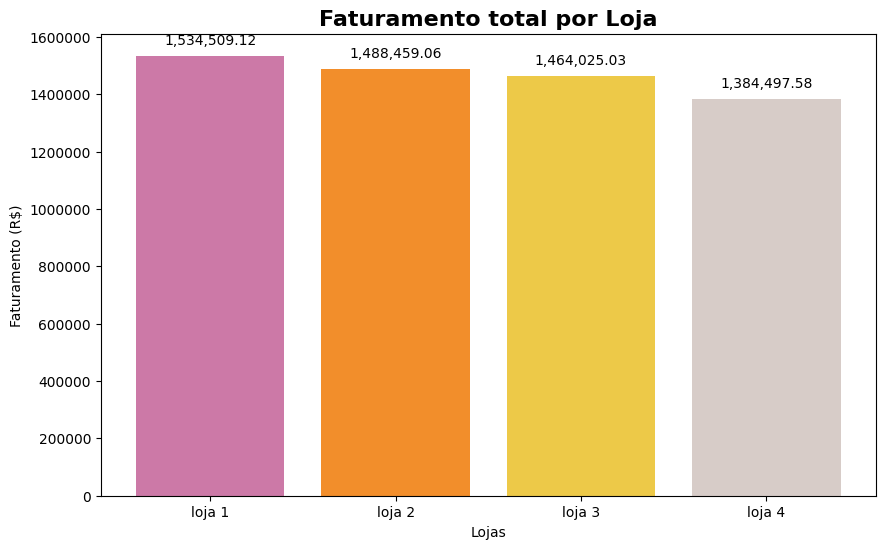

In [3]:
import matplotlib.pyplot as plt

cores = ['#CC79A7', '#F28E2B', '#EDC948', '#D7CCC8' ]

plt.figure(figsize=(10,6))
barras = plt.bar(faturamento_total.keys(), faturamento_total.values(), color=cores)
plt.ticklabel_format(axis='y', style='plain')
plt.xlabel('Lojas')
plt.ylabel('Faturamento (R$)')
plt.title('Faturamento total por Loja', fontsize=16, fontweight='bold')

for barra in barras:
    altura = barra.get_height()
    plt.text(barra.get_x() + barra.get_width() / 2,
             altura + (altura * 0.02),
             f'{altura:,.2f}',
             ha='center',
             va='bottom',
             fontsize=10)

plt.show()

# 2. Vendas por Categoria


In [7]:
def vendas_por_categoria(loja_df):
    loja_df.columns = loja_df.columns.str.strip()
    categorias = loja_df['Categoria do Produto']
    contagem = {}

    for categoria in categorias:
        if categoria in contagem:
            contagem[categoria] += 1
        else:
            contagem[categoria] = 1
    return contagem

vendas_loja1 = vendas_por_categoria(loja)
vendas_loja2 = vendas_por_categoria(loja2)
vendas_loja3 = vendas_por_categoria(loja3)
vendas_loja4 = vendas_por_categoria(loja4)

vendas_lojas = [vendas_loja1, vendas_loja2, vendas_loja3, vendas_loja4]

for i, vendas in enumerate(vendas_lojas, start=1):
    print(f"\nVendas por Categoria (Loja {i}):")
    for categoria, quantidade in vendas.items():
        print(f"{categoria}: {quantidade}")


Vendas por Categoria (Loja 1):
eletronicos: 448
moveis: 465
brinquedos: 324
eletrodomesticos: 312
utilidades domesticas: 171
esporte e lazer: 284
livros: 173
instrumentos musicais: 182

Vendas por Categoria (Loja 2):
moveis: 442
instrumentos musicais: 224
esporte e lazer: 275
eletronicos: 422
utilidades domesticas: 181
brinquedos: 313
eletrodomesticos: 305
livros: 197

Vendas por Categoria (Loja 3):
eletrodomesticos: 278
moveis: 499
instrumentos musicais: 177
esporte e lazer: 277
eletronicos: 451
brinquedos: 315
utilidades domesticas: 177
livros: 185

Vendas por Categoria (Loja 4):
eletrodomesticos: 254
moveis: 480
esporte e lazer: 277
livros: 187
eletronicos: 451
instrumentos musicais: 170
brinquedos: 338
utilidades domesticas: 201


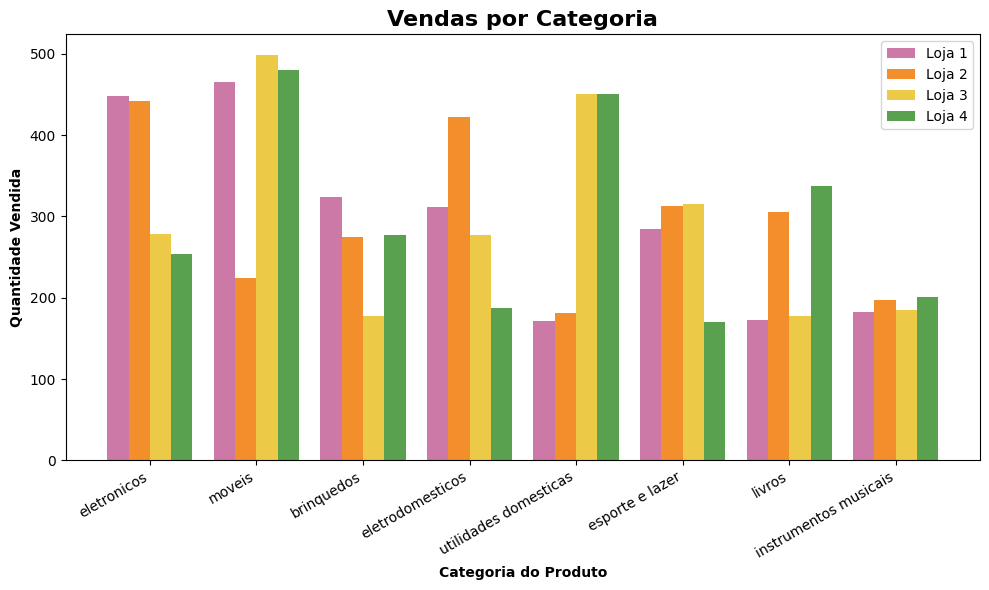

In [8]:
import matplotlib.pyplot as plt
import numpy as np

cores = ['#CC79A7', '#F28E2B', '#EDC948', '#59A14F' ]

categorias = list(vendas_loja1.keys())
n_categorias = len(categorias)

x = np.arange(n_categorias)
largura_barras = 0.2

plt.figure(figsize=(10,6))

for i, vendas in enumerate(vendas_lojas):
    valores = list(vendas.values())
    plt.bar(x + i * largura_barras, valores, width=largura_barras,
            label=f'Loja {i+1}', color=cores[i])

plt.xlabel('Categoria do Produto', fontweight='bold')
plt.ylabel('Quantidade Vendida', fontweight='bold')
plt.title('Vendas por Categoria', fontsize=16, fontweight='bold')

plt.xticks(x + largura_barras * 1.5, categorias, rotation=30, ha='right')

plt.legend()
plt.tight_layout()
plt.show()

# 3. Média de Avaliação das Lojas

In [9]:
def calc_Avaliacao(df: pd.DataFrame) -> float:
    try:
        avaliacao = round(df['Avaliação da compra'].mean(), 2)
        return avaliacao
    except:
          print('Erro ao calcular a média da avaliação de compras')
          return 0.0

for nome, loja in zip(['loja 1', 'loja 2', 'loja 3', 'loja 4'], [loja, loja2, loja3, loja4]):
    print(f'A avaliação média da {nome} é de {calc_Avaliacao(loja)}')

A avaliação média da loja 1 é de 3.98
A avaliação média da loja 2 é de 4.04
A avaliação média da loja 3 é de 4.05
A avaliação média da loja 4 é de 4.0


# 4. Produtos Mais e Menos Vendidos

In [ ]:
from collections import Counter

for i, loja_df in enumerate([loja, loja2, loja3, loja4], start=1):
    contagem = Counter(loja_df['Produto'])

    mais_vendido = contagem.most_common(1)[0]
    menos_vendido = min(contagem.items(), key=lambda x: x[1])

    print(f'\nLoja {i}:')
    print(f'Mais vendido: {mais_vendido[0]} ({mais_vendido[1]} unidades)')
    print(f'Menos vendido: {menos_vendido[0]} ({menos_vendido[1]} unidades)')

# 5. Frete Médio por Loja


In [ ]:
def frete_medio(loja):
  frete_medio = sum(loja['Frete']) / len(loja['Frete'])
  return frete_medio

for i, loja in enumerate([loja, loja2, loja3, loja4], start=1):
  print(f'O frete médio da loja {i} é de R${frete_medio(loja):.2f}')